# Сборный проект

In [1]:
!pip3 install phik

     |████████████████████████████████| 709 kB 1.3 MB/s eta 0:00:01


# Описание проекта

**Данные:**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Цель проекта

## Предобработка данных

В данном блоке необходимо загрузить данные и выполнить их предобработку

In [2]:
# подключаем используемые бибилиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import phik
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 30 
#увеличим дефолтный размер графиков
from pylab import rcParams


### Загрузка данных

In [3]:
try:
    data = pd.read_csv('games.csv', date_parser=True)
    
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', date_parser=True)

### Замена названия столбцов

Необходимо привести названия столбцов к **snake_case**

In [4]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
# переименуем столбцы

new_columns_name = {'Name' : 'name', 'Platform' : 'platform',
                    'Year_of_Release' : 'year_of_release',
                    'Genre' : 'genre', 'NA_sales' : 'na_sales',
                    'EU_sales' : 'eu_sales',
                   'JP_sales' : 'jp_sales', 'Other_sales' : 'other_sales',
                    'Critic_Score' : 'critic_score',
                    'User_Score' : 'user_score', 'Rating' : 'rating'}

data = data.rename(columns=new_columns_name)

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

Посмотрим сколько и где у нас пропусков

In [8]:
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

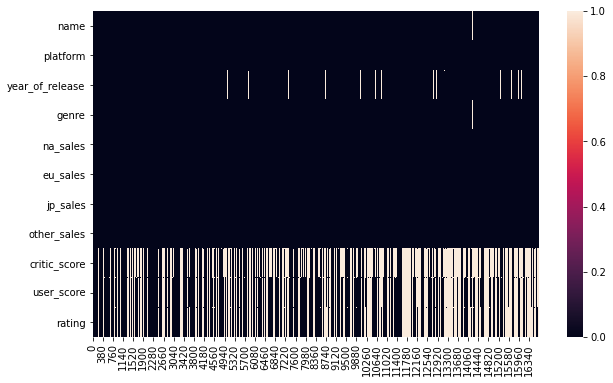

In [9]:
# визуализируем пропуски

plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose());

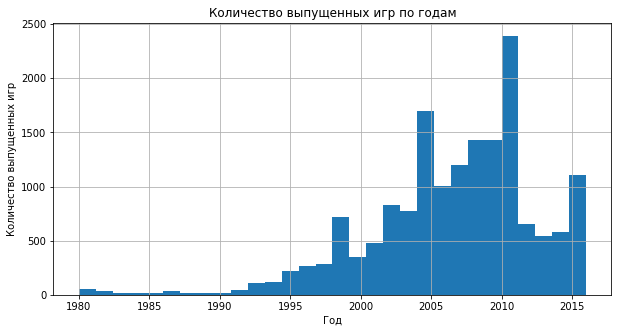

In [10]:
# посмотрим на распределение количества игр по годам
data['year_of_release'].hist(figsize=(10, 5), bins=30)
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.title('Количество выпущенных игр по годам');

In [11]:
# data['year_of_release'] = data['year_of_release']\
#                     .fillna(data.groupby(['platform'])['year_of_release']\
#                     .transform(lambda x: x.mode().iloc[0]))


data = data.dropna(subset=['year_of_release'])

In [12]:
# пропусков в переменной year_of_release больше нет
data.year_of_release.isna().mean()

0.0

In [13]:
data['name'] = data['name'].fillna('unknown')

In [14]:
data.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000122
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514593
user_score         0.401739
rating             0.406056
dtype: float64

In [15]:
# в жанрах всего 2 пропуска
data['genre'].isna().sum()

2

In [16]:
data = data.dropna(subset=['genre'])

In [17]:
data.genre.isna().mean()

0.0



<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Восстанавливать рейтинги и оценки критиков и пользователей, я считаю, что не стоит. Поскольку пропусков много, заполненение медианой или модой исказят данные, новые синтетические данные исказят все исследование. Заполню пропуски в переменной rating на unknown, поскольку, если рассматривать данные в разрезе регионов, то стоит отметить, что rating ERSB используется только в Америке и Канаде, в Японии и Европе используются другие рейтинги. Но поскольку игры могут попадать в эти страны и из-за рубежа с рейтингом от ERSB, то заполню просто на unknown, чтобы корректно обработать рейтинги в дальнейшем в разрезе по регионам.

In [18]:
# заполню рейтинги

data['rating'] = data['rating'].fillna('No_rating')

In [19]:
data.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.000000
dtype: float64



<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Причины возникнования пропусков: 
        
        1) Ошибка при выгрузке файла
        2) Нет данных
        3) Игра недавно вышла, и не собрала достаточное количество данных для занесения в базу
        4) Низкая популярность игры, поэтому не удалось собрать достаточно данных
        5) В колонке year_of_release, возможно, была ошибка в сборе данных, или о игре нет четких данных о дате выпуска.
        6) В колонке user_score tbd - означает, что подлежит уточнению и данных пока нет
        7) В колонке name, genre - возможно, забыли заполнить
        

### Преобразование типов данных

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Полагаю, что **нужно перевести**:
* year_of_release -> int
* user_score -> float64
* critic_score -> int




<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> tbd автоматически заменится на nan при конвертации типов
        

In [21]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# tbd в этом случае заменяется на nan

In [22]:
data['user_score'].isna().sum()

8981

In [23]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [25]:
data.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [27]:
#data.critic_score.astype('Int64')

In [54]:
data.critic_score = data.critic_score.fillna(-1).astype('int')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [56]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,No_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,No_rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,NaN,No_rating
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,NaN,No_rating
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,No_rating
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,NaN,No_rating


In [57]:
data.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.000000
user_score         0.546157
rating             0.000000
dtype: float64

In [58]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,No_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,No_rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,NaN,No_rating
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,NaN,No_rating
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,No_rating
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,NaN,No_rating


In [59]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()


1

In [60]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release']).reset_index(drop=True)

## Проверка данных на аномалии

Проверим данные на аномалии

In [61]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Платформа

In [62]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [63]:
data['platform'].isna().mean()

0.0

### Год реализации

In [64]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

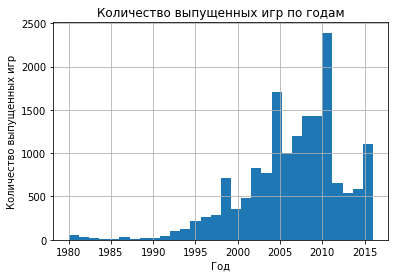

In [65]:
data['year_of_release'].hist(bins=30)
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.title('Количество выпущенных игр по годам');

### Продажи

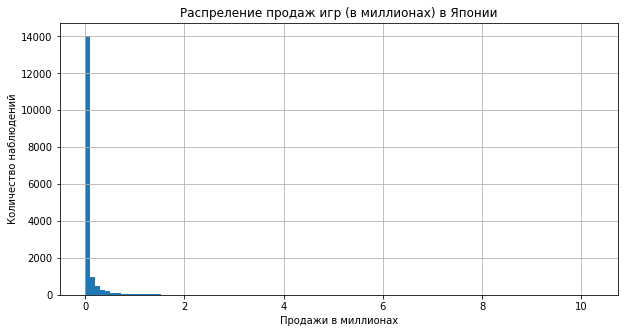

In [66]:
data['jp_sales'].hist(bins=100, figsize=(10, 5))
plt.xlabel('Продажи в миллионах')
plt.ylabel('Количество наблюдений')
plt.title('Распреление продаж игр (в миллионах) в Японии');
# видим жирный хвост, рассмотрим эти данные подробнее

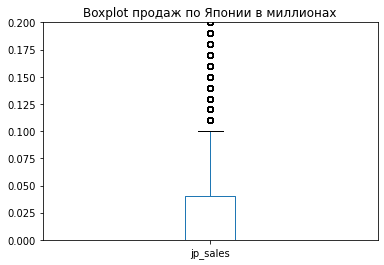

In [67]:
data['jp_sales'].plot(kind='box', ylim=(0, 0.2))

plt.title('Boxplot продаж по Японии в миллионах');

In [68]:
data.query('jp_sales > 5')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,No_rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,No_rating
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,-1,NaN,No_rating
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,-1,NaN,No_rating
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,-1,NaN,No_rating
26,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,3.43,5.35,5.32,1.18,77,7.1,E
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,-1,NaN,No_rating
43,Animal Crossing: Wild World,DS,2005,Simulation,2.50,3.45,5.33,0.86,86,8.7,E


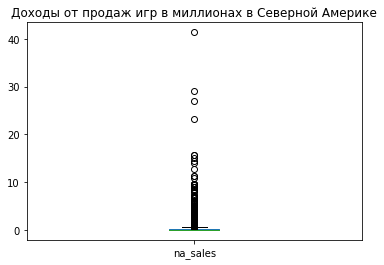

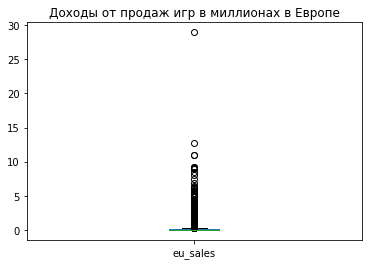

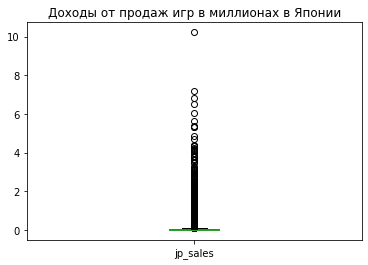

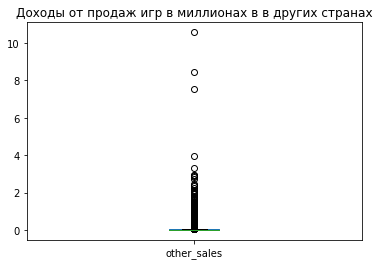

In [69]:
sales = {'na_sales' : 'Северной Америке',
         'eu_sales' : 'Европе',
         'jp_sales': 'Японии',
         'other_sales' : 'в других странах'}

for sale in sales:
    data[sale].plot(kind='box')
    plt.title('Доходы от продаж игр в миллионах в '+ sales[sale])
    print()
    plt.show()

### Рейтинги

In [70]:
# проверка выхода за диапазон оценки критиков
data.query('critic_score > 99')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


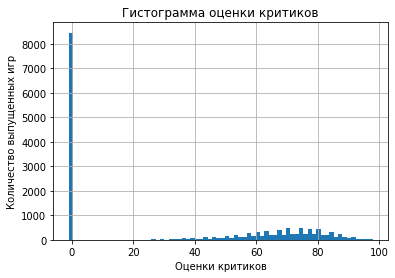

In [71]:
data['critic_score'].hist(bins=70)
plt.xlabel('Оценки критиков')
plt.ylabel('Количество выпущенных игр')
plt.title('Гистограмма оценки критиков');

In [72]:
# проверка выхода за диапазон оценки пользователей
data.query('user_score > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


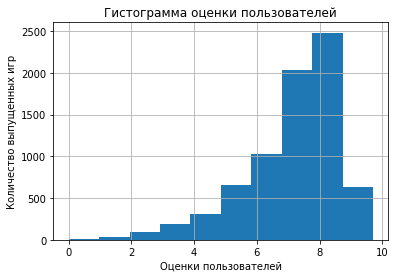

In [73]:
data['user_score'].hist()
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество выпущенных игр')
plt.title('Гистограмма оценки пользователей');

In [74]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Рассчет суммарных продаж

In [75]:
data['sum_sales'] = data['na_sales'] + data['eu_sales']\
                    + data['jp_sales'] + data['other_sales']

In [76]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,No_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,No_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,NaN,No_rating,0.01
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,NaN,No_rating,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,No_rating,0.01
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,NaN,No_rating,0.01


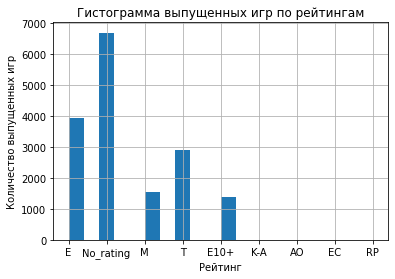

In [77]:
data['rating'].hist(bins=20)
plt.xlabel('Рейтинг')
plt.ylabel('Количество выпущенных игр')
plt.title('Гистограмма выпущенных игр по рейтингам');

**Рейтинги:**
* E - для всех
* M - для взрослых
* T - подросткам
* E10+ - для всех от 10 и старше
* K-A - для всех (до 1998)
* AO - только для взрослых
* EC - для детей младшего возраста
* RP - рейтинг ожидается




<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> *Можем объединить категории "для всех"
        



In [78]:
data.query('rating == "K-A"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
650,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,-1,9.0,K-A,2.40
892,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92,7.4,K-A,1.91
16409,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,-1,8.1,K-A,0.01



<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Объединяем категории
        



In [79]:
data = data.replace({'rating' : {'K-A' : 'E'}})

In [80]:
data.query('rating == "K-A"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


In [81]:
# успешно заменили
data.query('rating == "E" and name == "Worms 2"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16409,Worms 2,PC,1997,Strategy,0.0,0.01,0.0,0.0,-1,8.1,E,0.01


## Исследовательский анализ данных

В данном блоке необходимо провести EDA и ответить на **следующие вопросы:**

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?



* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.



* Не учитывайте в работе данные за предыдущие годы.


* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


* Соотнесите выводы с продажами игр на других платформах.


* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?





### Общая информация

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  sum_sales        16443 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

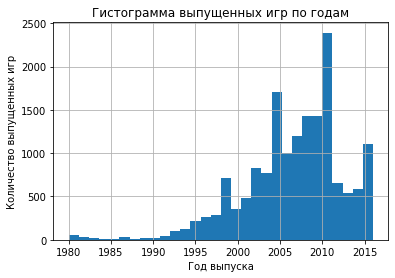

In [83]:
# посмотрим на распределение выпущенных игр по годам
data['year_of_release'].hist(bins=30)
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Гистограмма выпущенных игр по годам');

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Сгруппируем данные и посмотрим на суммарные продажи по платформам.

In [84]:
z = data.groupby(['platform'])['sum_sales'].agg(['sum']).sort_values(by='sum', ascending=False).reset_index()
z

,platform,sum
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81



<div class="alert alert-info">
<font size="4", color = "black"><b>✍ **Исправление**</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Визуализация суммарных продаж по платформам за все время

Text(0.5, 1.0, 'Продажи по платформам за все время')

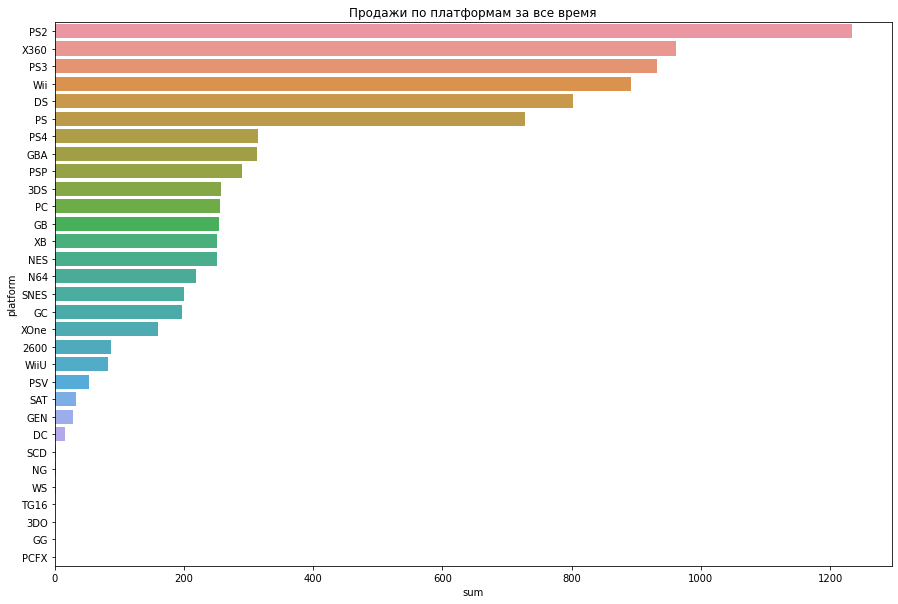

In [85]:
plt.rcParams['figure.figsize']=(15,10) #изенение размера графика в seaborn
sns.barplot(data=z, x='sum', y='platform')
plt.title('Продажи по платформам за все время')

In [86]:
top_platform = data.query('year_of_release >=2000').groupby(['platform'])['sum_sales'].agg(['sum']).sort_values(by='sum', ascending=False).head(10).index.values
top_platform

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'GBA', 'PSP', '3DS',
       'XB'], dtype=object)

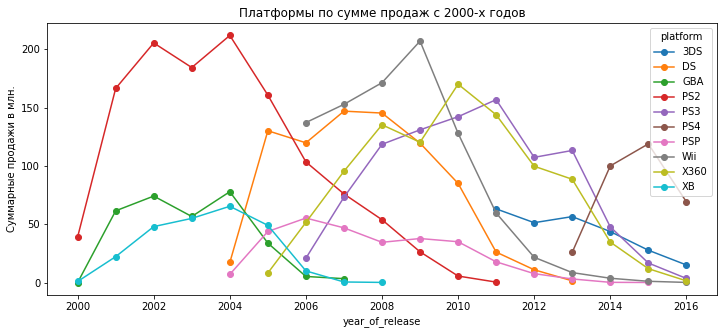

In [87]:
data.query('platform in @top_platform and year_of_release >= 2000')\
                    .pivot_table(index='year_of_release', columns='platform',
                    values='sum_sales', aggfunc='sum')\
                    .plot(kind='line',style='o-', figsize=(12, 5))
plt.ylabel('Суммарные продажи в млн.')
plt.title('Платформы по сумме продаж с 2000-x годов');

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [88]:
data.query('year_of_release in (2014, 2015, 2016)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,NaN,No_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,NaN,No_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,NaN,No_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16431,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,No_rating,0.01
16435,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,NaN,No_rating,0.01
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,NaN,No_rating,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,No_rating,0.01


In [89]:
# запишем данные, с которыми будем работать в новый датафрейм

games = data.query('year_of_release in (2014, 2015, 2016)')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,NaN,No_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,NaN,No_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,NaN,No_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16431,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,No_rating,0.01
16435,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,NaN,No_rating,0.01
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,NaN,No_rating,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,No_rating,0.01


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [143]:
z = games.pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='mean')
z 

year_of_release,2014,2015,2016
platform,,,
3DS,0.547000,0.323023,0.329130
PC,0.282553,0.170400,0.097222
PS3,0.442222,0.230411,0.094737
PS4,1.333333,0.867883,0.422256
PSP,0.024000,0.040000,NaN
PSV,0.119000,0.056818,0.050000
Wii,0.625000,0.285000,0.180000
WiiU,0.710645,0.583929,0.328571
X360,0.551429,0.341714,0.116923


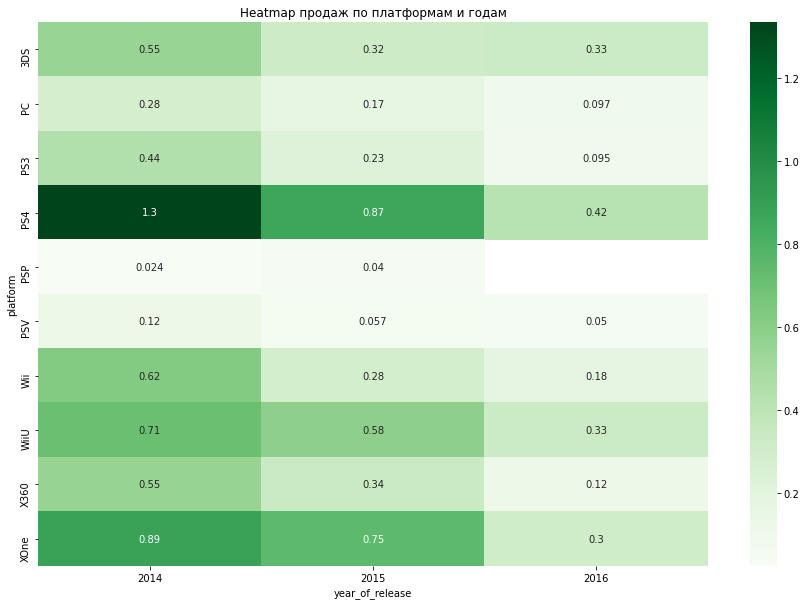

In [91]:
sns.heatmap(z, cmap="Greens", annot=True)
plt.title('Heatmap продаж по платформам и годам');


<div class="alert alert-info">
<font size="4", color = "black"><b>✍ **Исправление**</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Из heatmap выделяются по средним продажам - 3DS, PS4, WiiU, XOne, X360

<div class="alert alert-warning">
<h2> Комментарий ревьюера <font color= "black"> V2</font> <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> 
    
При наличии выбросов стоит использовать медианное значение, а еще лучше подсчитать оба показателя

In [92]:
# сгруппируем платформы, начиная с 2014 года по средним продажам
z = games.pivot_table(
                      index='platform', values='sum_sales',
                      aggfunc='mean')
z = z.sort_values(by='sum_sales', ascending=False).reset_index(drop=False)
z

,platform,sum_sales
0,PS4,0.766356
1,XOne,0.615614
2,WiiU,0.588767
3,Wii,0.460909
4,X360,0.434414
5,3DS,0.408868
6,PS3,0.311324
7,PC,0.179139
8,PSV,0.075932
9,PSP,0.027692


In [93]:
labels = z['platform'].unique()
labels

array(['PS4', 'XOne', 'WiiU', 'Wii', 'X360', '3DS', 'PS3', 'PC', 'PSV',
       'PSP'], dtype=object)

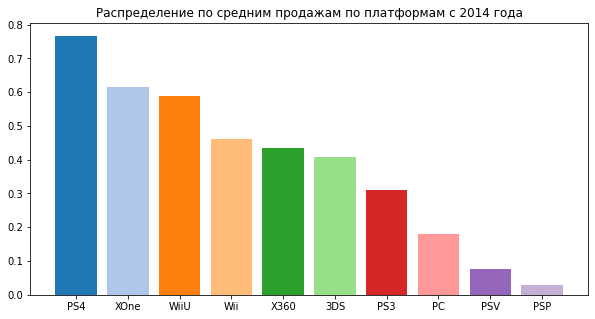

In [94]:
# рисую через matplotlib
plt.rcParams['figure.figsize'] = (10, 5)
labels = z['platform'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
plt.bar(z['platform'], z['sum_sales'],  color=[colors[key] for key in labels])
plt.title('Распределение по средним продажам по платформам с 2014 года');

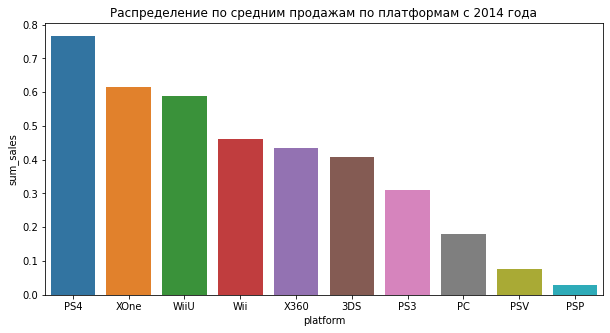

In [95]:
# рисую через seaborn
sns.barplot(
    data=z,
    x="platform", 
    y="sum_sales")
plt.title('Распределение по средним продажам по платформам с 2014 года');

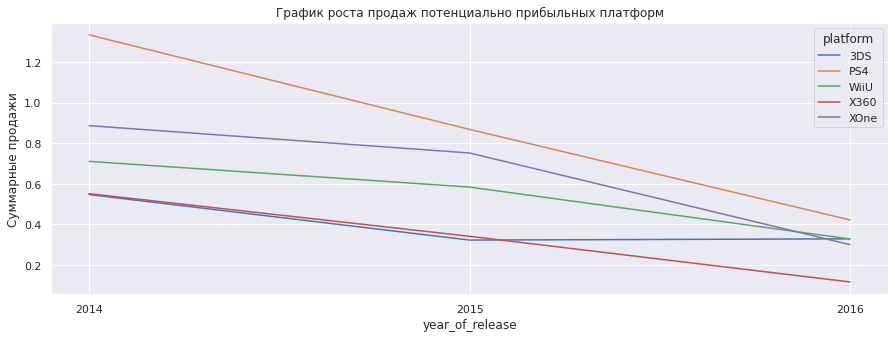

In [141]:
games.query('platform in ("PS4", "XOne", "WiiU", "X360", "3DS")')\
            .pivot_table(index='year_of_release', columns='platform',
             values='sum_sales', aggfunc='mean')\
            .plot(kind='line')
plt.title('График роста продаж потенциально прибыльных платформ')
plt.xticks([2014, 2015, 2016])
plt.ylabel('Суммарные продажи');

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
<b>На доработку🤔:</b>
    
Выше мы отобрали потенциально прибыльные платформы. Весь последующий анализ стоит выполнять по ним    

In [97]:
# потенциально прибыльные платформы
platform = ("PS4", "XOne", "WiiU", "X360", "3DS")

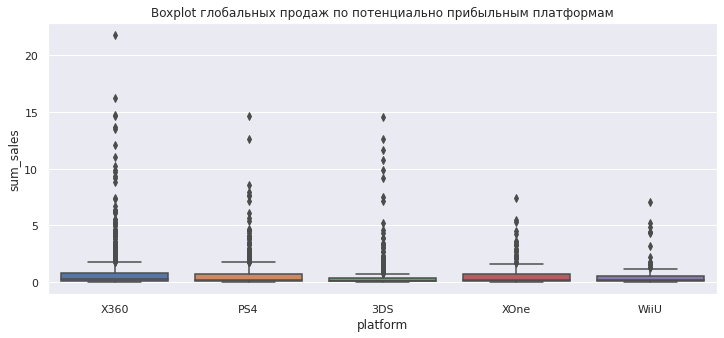

In [98]:
data_top_platform = data.query('platform in @platform')
sns.set(rc={"figure.figsize":(12, 5)})
sns.boxplot(data=data_top_platform, x='platform', y='sum_sales')
plt.title('Boxplot глобальных продаж по потенциально прибыльным платформам');

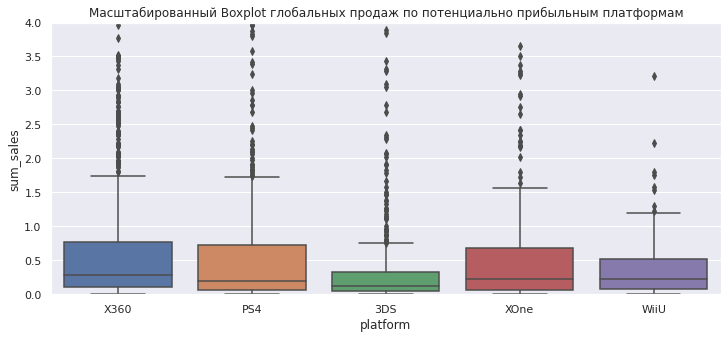

In [99]:
data_top_platform = data.query('platform in @platform')
sns.set(rc={"figure.figsize":(12, 5)})
sns.boxplot(data=data_top_platform, x='platform', y='sum_sales')
plt.ylim(0, 4)
plt.title('Масштабированный Boxplot глобальных продаж по потенциально прибыльным платформам');

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Text(0.5, 1.0, 'Гистограмма продаж по платформе PS4 2014-2016 года')

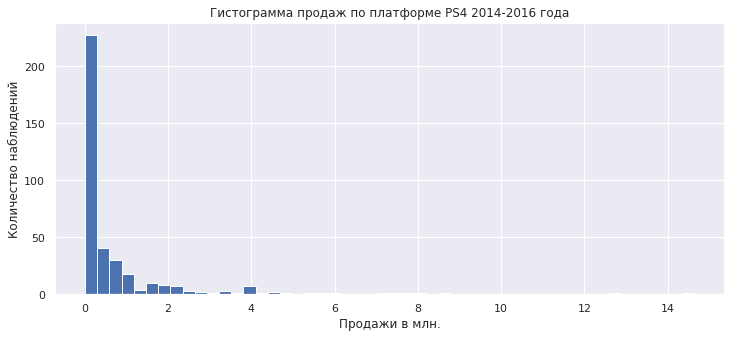

In [100]:
games.query("platform == 'PS4'")['sum_sales'].hist(bins=50)
plt.xlabel('Продажи в млн.')
plt.ylabel('Количество наблюдений')
plt.title('Гистограмма продаж по платформе PS4 2014-2016 года')

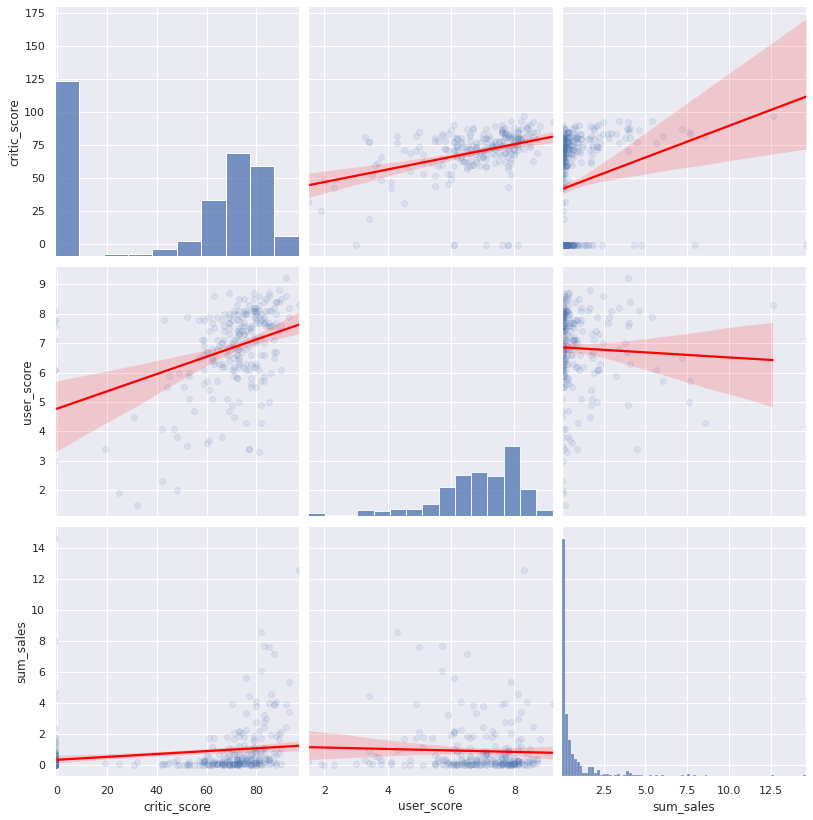

In [101]:
# сравнение зависимостей оценок

data_plot = games.query('platform == "PS4"')
sns.pairplot(data_plot[['critic_score', 'user_score', 'sum_sales']],
                             kind='reg',
                             plot_kws={'line_kws':{'color':'red'},
                                       'scatter_kws': {'alpha': 0.1}})
plt.gcf().set_size_inches(12,12);


In [102]:
phik = games.phik_matrix()

interval columns not set, guessing: ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'sum_sales']


In [103]:
phik['sum_sales'].sort_values(ascending=False)

sum_sales          1.000000
na_sales           0.962355
other_sales        0.915542
eu_sales           0.811517
jp_sales           0.618111
critic_score       0.278078
genre              0.209198
rating             0.191384
platform           0.118133
year_of_release    0.051420
name               0.000000
user_score         0.000000
Name: sum_sales, dtype: float64

In [104]:
games['sum_sales'].corr(games['user_score'])

# обратная слабая корреяция, игроки ведь заранее не могут поиграть

-0.013070305002484585

In [105]:
games['sum_sales'].corr(games['critic_score'])

# видим прямую слабую связь от отзывов критиков на продажи

0.20265123302382476

### Соотнесите выводы с продажами игр на других платформах.


Платформа: PS4
Корреляция Пирсона sum_sales от critic_score: 0.2108468533672136
Корреляция Пирсона sum_sales от user_score: -0.040131589472697356

Платформа: XOne
Корреляция Пирсона sum_sales от critic_score: 0.27147591419241845
Корреляция Пирсона sum_sales от user_score: -0.0703839280647581

Платформа: WiiU
Корреляция Пирсона sum_sales от critic_score: 0.29129578447715676
Корреляция Пирсона sum_sales от user_score: 0.4079264579217078

Платформа: X360
Корреляция Пирсона sum_sales от critic_score: 0.0040124593668721415
Корреляция Пирсона sum_sales от user_score: -0.138444570945665

Платформа: 3DS
Корреляция Пирсона sum_sales от critic_score: 0.05299207908897057
Корреляция Пирсона sum_sales от user_score: 0.2151932718527028



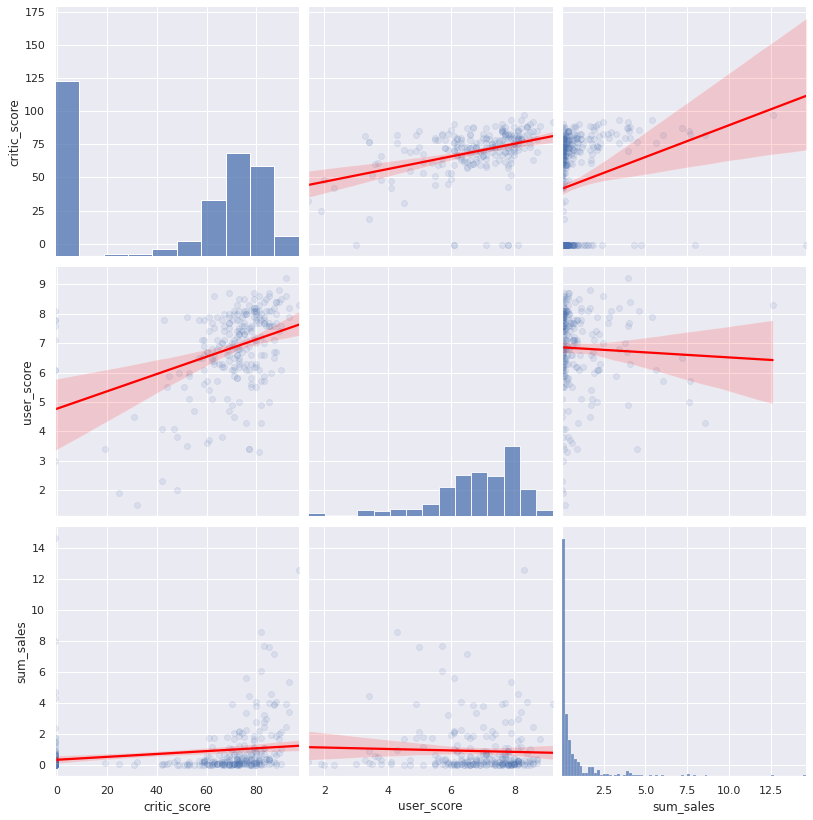

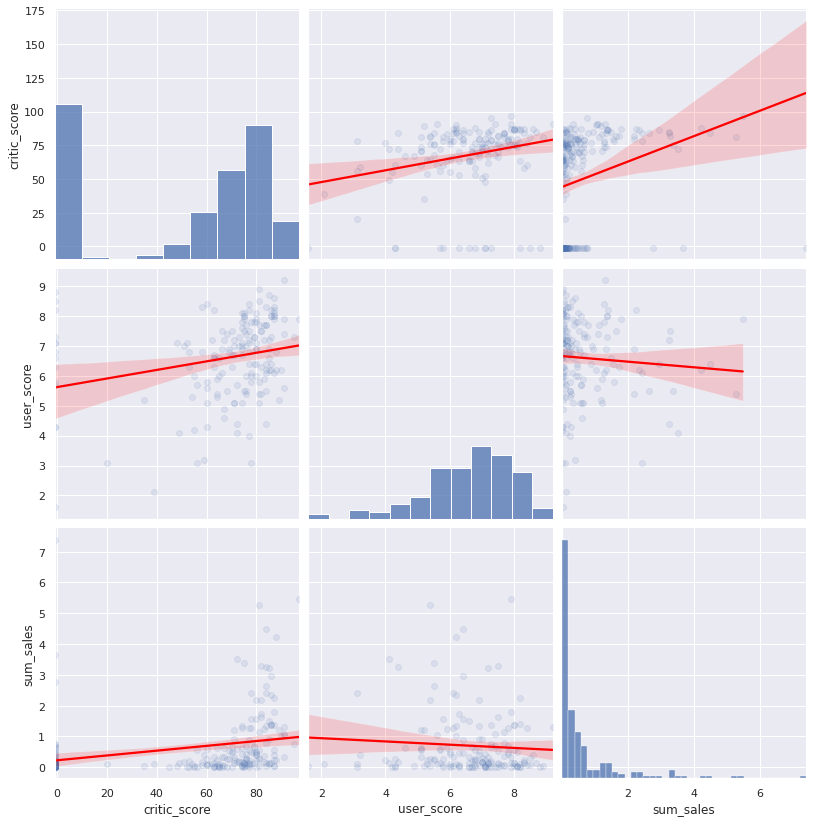

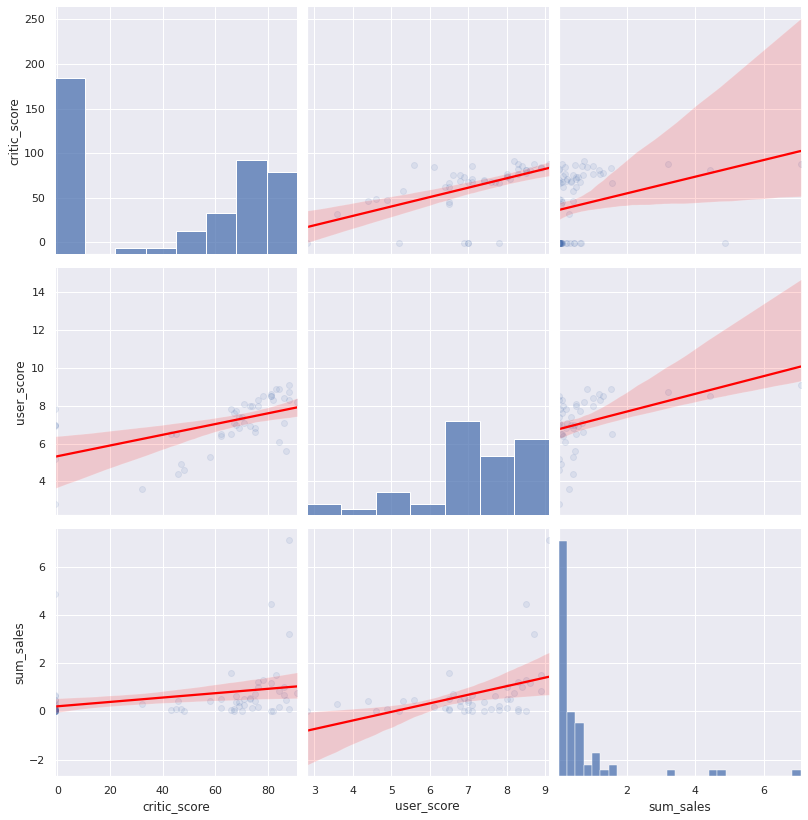

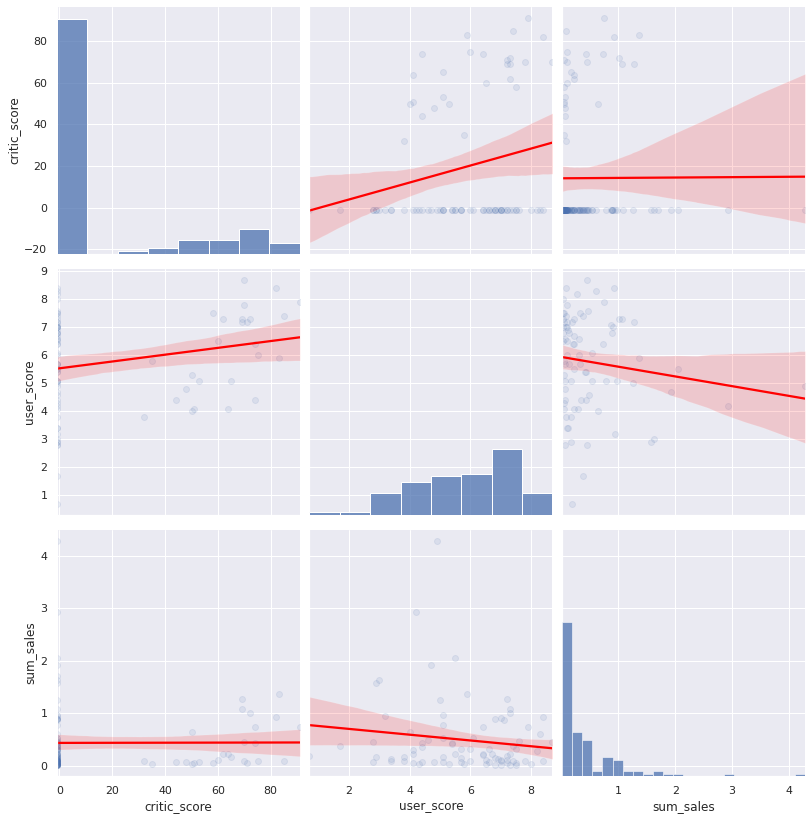

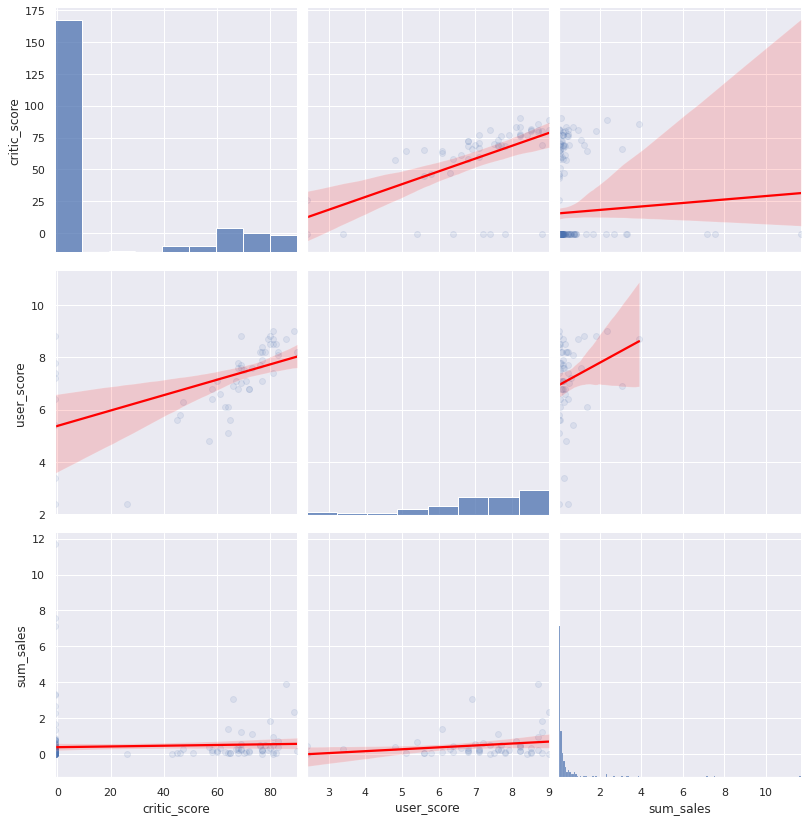

In [106]:
# рассмотрим еще несколько платформ и расчитаем для них корреляции

# потенциально прибыльные платформы
platforms = ("PS4", "XOne", "WiiU", "X360", "3DS")



for i in platforms:
    test = games.query('platform == @i')
    print('Платформа:', i)
    print('Корреляция Пирсона sum_sales от critic_score:', test['sum_sales']. corr(test['critic_score']))
    print('Корреляция Пирсона sum_sales от user_score:', test['sum_sales']. corr(test['user_score']))
    print()
    sns.pairplot(test[['critic_score', 'user_score', 'sum_sales']],
                        kind='reg',
                        plot_kws={'line_kws':{'color':'red'},
                        'scatter_kws': {'alpha': 0.1}})
    plt.gcf().set_size_inches(12,12);
    

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [107]:
games.genre.nunique()

12

Text(0.5, 1.0, 'Распределение жанров по играм')

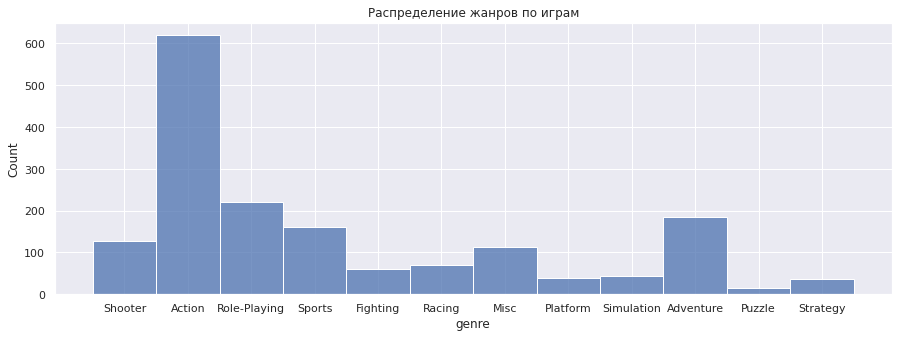

In [108]:
plt.rcParams['figure.figsize']=(15,5) #изенение размера графика в seaborn
sns.histplot(data=games, x='genre', bins=12)
plt.title('Распределение жанров по играм')

In [109]:
# общее распределение игр по жанрам - преобладает жанр Action
t = games['genre'].value_counts().reset_index()
t = t.rename(columns={'index' : 'genre', 'genre' : 'count'})
t

,genre,count
0,Action,619
1,Role-Playing,221
2,Adventure,185
3,Sports,161
4,Shooter,128
5,Misc,113
6,Racing,69
7,Fighting,60
8,Simulation,44
9,Platform,38


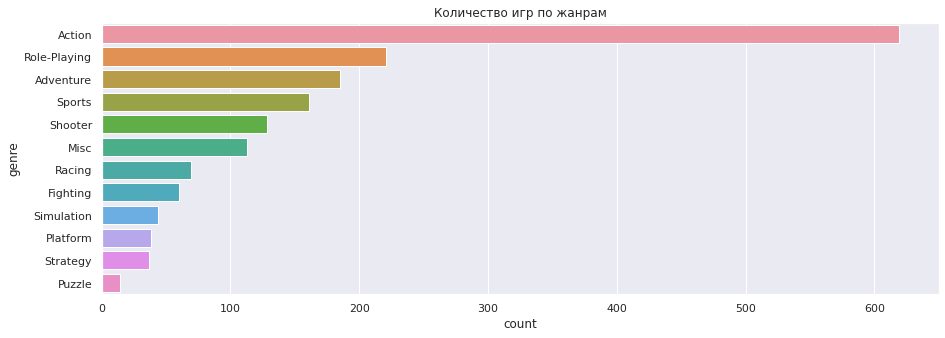

In [110]:
plt.rcParams['figure.figsize']=(15,5) # изменение размера
sns.barplot(data=t, x='count', y='genre')
plt.title('Количество игр по жанрам');

**Рассмотрим самые прибыльные жанры по всем платформам**

In [111]:
z = games.pivot_table(index='genre', columns='platform', values='sum_sales', aggfunc='mean')
z 

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,
Action,0.253563,0.136923,0.235065,0.645211,0.033333,0.067297,0.198333,0.285429,0.352286,0.383457
Adventure,0.074762,0.048750,0.094286,0.226429,0.012500,0.030946,0.180000,0.056667,0.172727,0.191429
Fighting,1.620000,0.050000,0.170000,0.454706,NaN,0.098571,NaN,2.940000,0.132000,0.434000
Misc,0.192500,0.016667,0.477857,0.408947,0.010000,0.201765,1.046667,0.353077,0.254000,0.396471
Platform,0.497500,0.060000,0.253333,0.602222,NaN,0.047500,NaN,0.981429,0.095000,0.155000
Puzzle,0.124286,NaN,0.040000,0.020000,NaN,0.030000,NaN,0.406667,NaN,NaN
Racing,NaN,0.049231,0.125000,0.564444,NaN,0.033333,NaN,7.090000,0.205000,0.382778
Role-Playing,0.976098,0.270556,0.236786,0.568431,NaN,0.103390,NaN,0.380000,0.460000,0.753571
Shooter,NaN,0.275714,0.869286,2.064737,NaN,0.640000,NaN,1.610000,0.910667,1.538611


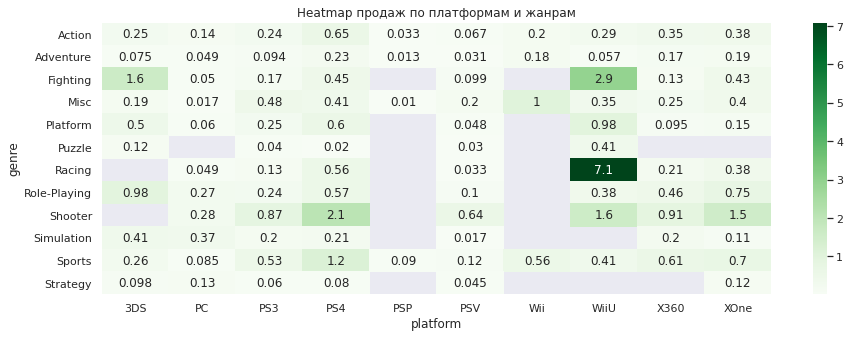

In [112]:
sns.heatmap(z, cmap="Greens", annot=True)
plt.title('Heatmap продаж по платформам и жанрам');

In [113]:
# график зависимости жанра от продаж

In [114]:
z = games.pivot_table(index='genre',
                  values='sum_sales',
                  aggfunc='mean').reset_index()\
                  .sort_values(by='sum_sales', ascending=False)
z

,genre,sum_sales
8,Shooter,1.335469
10,Sports,0.680000
4,Platform,0.476053
2,Fighting,0.470333
7,Role-Playing,0.459005
6,Racing,0.398841
3,Misc,0.332301
0,Action,0.322068
9,Simulation,0.298409
5,Puzzle,0.157857


<AxesSubplot:xlabel='sum_sales', ylabel='genre'>

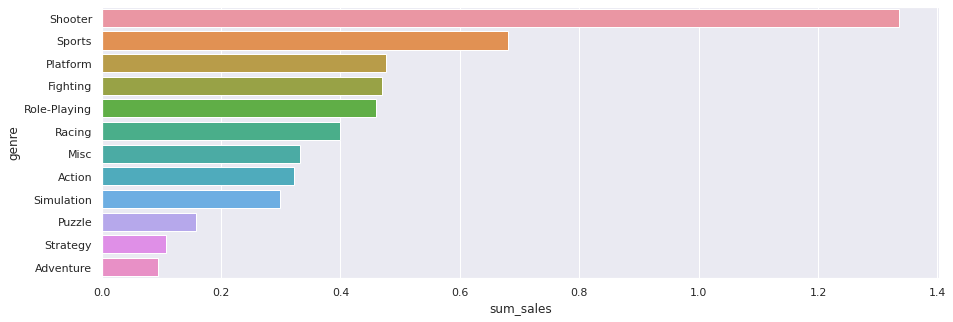

In [115]:
sns.barplot(data=z, x='sum_sales', y='genre')

In [116]:
# да, жанры по продажам выделяются, те игры, например пазл, их меньше
# выпускают, и в них меньше играют, а другие игры выпускают и играют,
# там распределение немного изменилось

## Портрет пользователя по регионам

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### NA

**Рассмотрим топ-5 популярных платформ по NA**

In [117]:
top_5_platform_na = games.groupby(by=['platform'], dropna=False)['na_sales']\
                                 .agg(['sum'])\
                                 .sort_values(by='sum', ascending=False).head(5).reset_index()
top_5_platform_na

,platform,sum
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


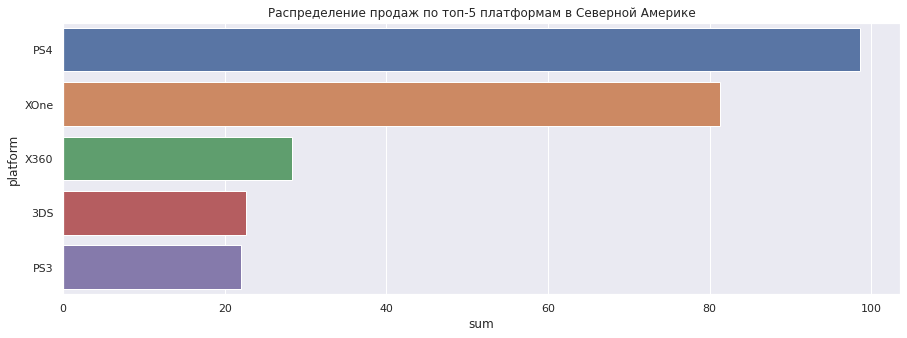

In [118]:
sns.barplot(data=top_5_platform_na, x='sum', y='platform')
plt.title('Распределение продаж по топ-5 платформам в Северной Америке');

**теперь опишем самые популярные жанры**

In [119]:
top_5_genre_na = games.groupby(['genre'])['na_sales']\
                        .agg(['sum'])\
                        .sort_values(by='sum', ascending=False)\
                        .head(5)\
                        .reset_index()
top_5_genre_na

,genre,sum
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


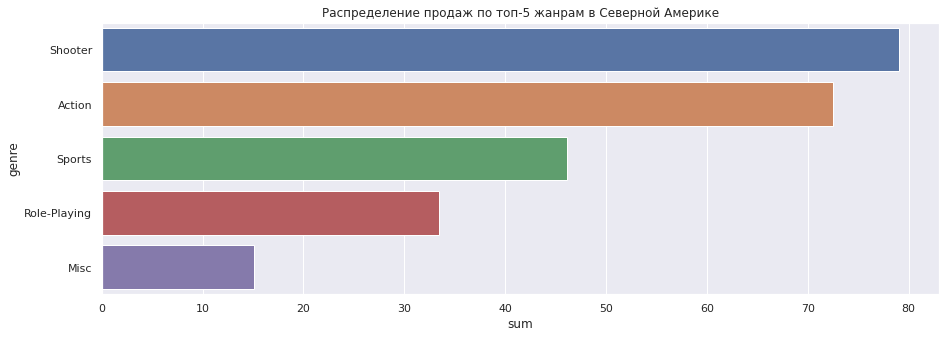

In [120]:
sns.barplot(data=top_5_genre_na, x='sum', y='genre')
plt.title('Распределение продаж по топ-5 жанрам в Северной Америке');

**влияет ли рейтинг ERSB на продажи**

In [121]:
z = games.groupby(['rating'], dropna=False)['na_sales']\
                             .agg(['sum'])\
                             .sort_values(by='sum', ascending=False)\
                             .head(5)\
                             .reset_index()
z

,rating,sum
0,M,96.42
1,No_rating,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


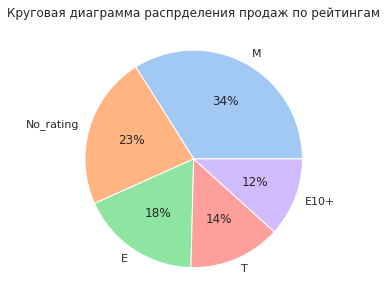

In [122]:

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(z['sum'], labels = z['rating'], colors = colors, autopct='%.0f%%')
plt.title('Круговая диаграмма распрделения продаж по рейтингам');

### EU

**Рассмотрим топ-5 популярных платформ по EU**

In [123]:
top_5_platform_na = games.groupby(by=['platform'], dropna=False)['eu_sales']\
                                 .agg(['sum'])\
                                 .sort_values(by='sum', ascending=False).head(5).reset_index()
top_5_platform_na

,platform,sum
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


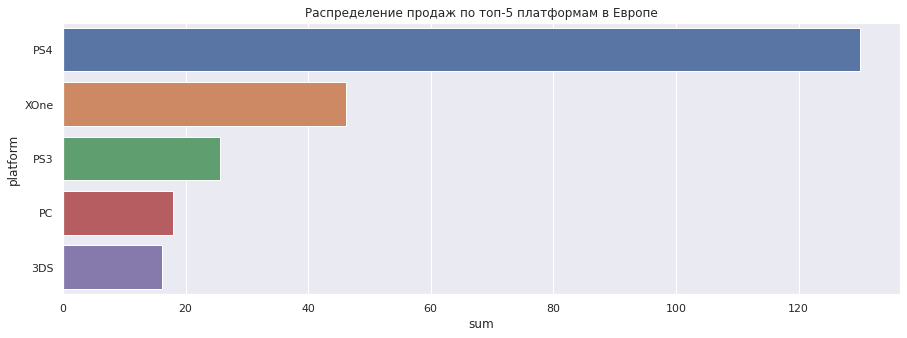

In [124]:
sns.barplot(data=top_5_platform_na, x='sum', y='platform')
plt.title('Распределение продаж по топ-5 платформам в Европе');

**теперь опишем самые популярные жанры**

In [125]:
top_5_genre_na = games.groupby(['genre'])['eu_sales']\
                        .agg(['sum'])\
                        .sort_values(by='sum', ascending=False)\
                        .head(5)\
                        .reset_index()
top_5_genre_na

,genre,sum
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


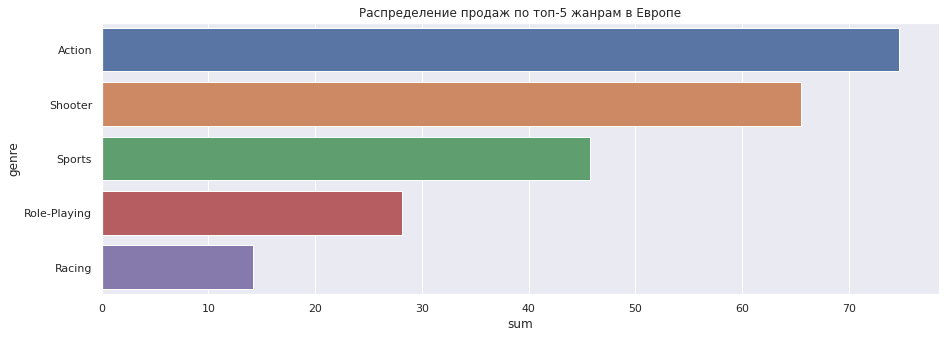

In [126]:
sns.barplot(data=top_5_genre_na, x='sum', y='genre')
plt.title('Распределение продаж по топ-5 жанрам в Европе');

**влияет ли рейтинг ERSB на продажи**

In [127]:
z = games.groupby(['rating'], dropna=False)['eu_sales']\
                             .agg(['sum'])\
                             .sort_values(by='sum', ascending=False)\
                             .head(5)\
                             .reset_index()
z

,rating,sum
0,M,93.44
1,No_rating,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


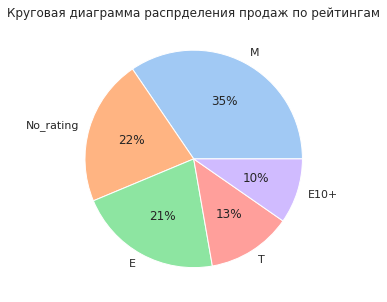

In [128]:

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(z['sum'], labels = z['rating'], colors = colors, autopct='%.0f%%')
plt.title('Круговая диаграмма распрделения продаж по рейтингам');

### JP

**Рассмотрим топ-5 популярных платформ по JP**

In [129]:
top_5_platform_na = games.groupby(by=['platform'], dropna=False)['jp_sales']\
                                 .agg(['sum'])\
                                 .sort_values(by='sum', ascending=False).head(5).reset_index()
top_5_platform_na

,platform,sum
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


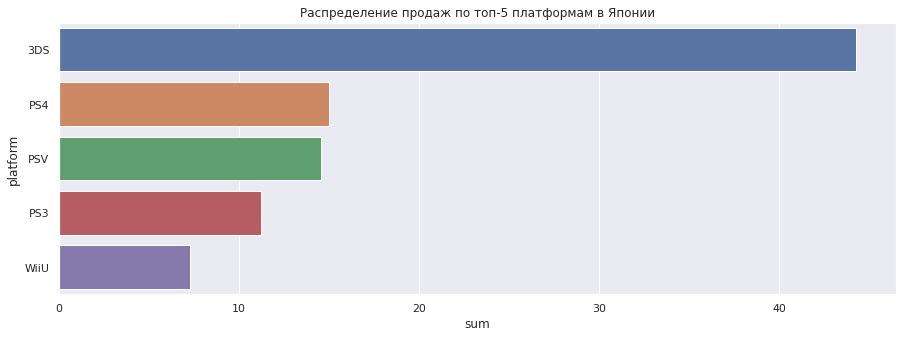

In [130]:
sns.barplot(data=top_5_platform_na, x='sum', y='platform')
plt.title('Распределение продаж по топ-5 платформам в Японии');

**теперь опишем самые популярные жанры**

In [131]:
top_5_genre_na = games.groupby(['genre'])['jp_sales']\
                        .agg(['sum'])\
                        .sort_values(by='sum', ascending=False)\
                        .head(5)\
                        .reset_index()
top_5_genre_na

,genre,sum
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


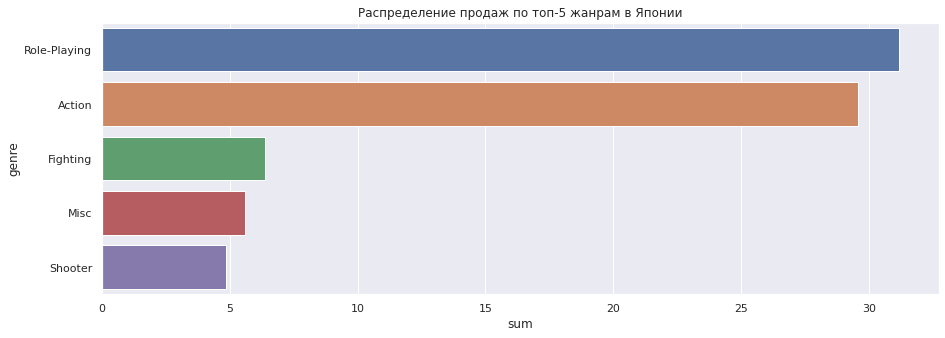

In [132]:
sns.barplot(data=top_5_genre_na, x='sum', y='genre')
plt.title('Распределение продаж по топ-5 жанрам в Японии');

**влияет ли рейтинг ERSB на продажи**

In [133]:
z = games.groupby(['rating'], dropna=False)['jp_sales']\
                             .agg(['sum'])\
                             .sort_values(by='sum', ascending=False)\
                             .head(5)\
                             .reset_index()
z

,rating,sum
0,No_rating,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


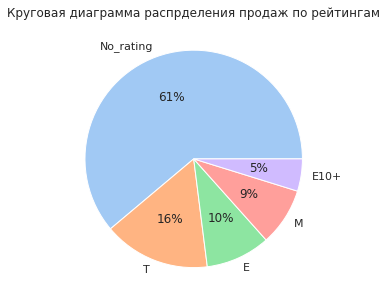

In [134]:

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(z['sum'], labels = z['rating'], colors = colors, autopct='%.0f%%')
plt.title('Круговая диаграмма распрделения продаж по рейтингам');

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> В Японии рейтинг ERSB влияет не сильно, поскольку в Японии регулятором рейтинга игр является совершенно другая организация. Поэтому для Японии организация ERSB оказывает значительно меньшее влияние на продажи, чем на Северную Америку и Европу

## Проверка гипотез

**Проверим наши гипотезы**

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Уровень значимости alpha, из-за того, что выборки у нас небольшие установим стандартное 0.05. Поскольку обе гипотезы ниже у нас проверяются на независимых выборках, то в качестве теста будем использовать t-test Стъюдента для независимых выборок.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [135]:

# берем выборки без  nan
sample_1 = games.query('platform == "XOne" and user_score.notnull()')['user_score'].values

sample_2 = games.query('platform == "PC" and user_score.notnull()')['user_score'].values


alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

result = st.ttest_ind(sample_1, sample_2, equal_var=True)

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> При уровне значимости alpha = 0.05 мы не отвергаем нулевую гипотезу H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

### Средние пользовательские рейтинги жанров Action  и Sports разные

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports отличаются.

In [136]:
sample_1 = games.query('genre == "Action" and user_score.notnull()')['user_score'].values

sample_2 = games.query('genre == "Sports" and user_score.notnull()')['user_score'].values


alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

result = st.ttest_ind(sample_1, sample_2, equal_var=True)

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


In [137]:
# Посчитаем средние вручную, оин действительно отличаются

In [138]:
games.query('genre == "Action" and user_score.notnull()')['user_score'].mean()

6.760606060606061

In [139]:
games.query('genre == "Sports" and user_score.notnull()')['user_score'].mean()

5.2251968503937

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> При уровне значимости alpha = 0.05 мы  отвергаем нулевую гипотезу H0 и принимаем альтернативную гипотезу H1: Средние пользовательские рейтинги жанров Action и Sports отличаются.

## Общий вывод по проекту

В данном проекте мы рассмотрели аналитический кейс о продаже игр на платформе и пришли к следующим **выводам**:

* Большая часть пропусков - вероятнее всего, ошибки при выгрузке данных, либо данные вообще не заполнялись, либо ошибки при заполнении.



* Пропущенные оценки восстанавливать нет смысла, поскольку синтетические данные сильно исказят картину исследования.



* Стоит отметить, что rating ERSB используется только в Америке и Канаде + часто в Европе, **в Японии используются другие рейтинги.**



* Аномалий по продажам игр нет, хотя и есть очень много бестселлеров, по типу mario и pokemon, что сильно меняет boxplot.



* Также было отмечено, что категория K-A в конечном итоге была заменена на категорию E.



* Игровая индустрия, в 80-x находилась **на этапе зарождения**, затем, начная с 90-х годов мы наблюдаем рост производства игр. 

* Характерный срок для появления и ухода новой платформы 10 лет



* Если нам необходимо спрогнозировать на 2017 год, то нет смысла рассматривать старые исторические данные. Игровая индустрия меняется очень быстро, даже 3 года для игровой индустрии это очень большой промежуток времени. Поэтому мы рассмотрели промежуток с 2014 года и дальше.



* Если смотреть на распредление приставок по продажам игр на период 2014 - 2016, то лидирует по продажам платформа PS4. Самые низкие продажи у PSP. Если отталкиваться от количества продаж, то потенциально прибыльные платформы - "PS4", "XOne", "WiiU", "X360", "3DS".



* Отзывы критиков имеют линейное влияние на продажи, предположу, что перед выпуском игр им заранее дают отзыв для демо-игры, а основании этого они дают оценку и пишут об игре в своих блогах, а это читают потенциальные покуатели. Что касается зависимости продаж от отзывов пользоватлей, то ее нет. 



* Если расссматривать лидера продаж по жанрам, то с большим отрывом лидирует жанр Shooter.



*  По продажам по платформе PS4 лидирует жанр Action, по платформе 3DS лидирует жанр Role-Playing, что неудивительно, приставка нинтендо - Японская, а там это самый поппурный жанр. По XOne лидирует - Shooter



*  Выделяется по продажам жанр Shooter, как самый продаваемый, затем расположились Shooter, Sports и Role-Playing. Самые низкие продажи по жанру Puzzle и Strategy, вероятно потому, что они не такие "захватывающие" как другие жанры



* **Рассмотрим выводы по регионам**

* **в Северной Америке** наиболее распространение имеет PS4 и XOne, последняя принадлежит американской Microsoft, а PS4 - неофициальный стандарт для приставок. Низкая доля продаж 3DS объясняется тем, что Нинтендо свитч не сильно пользуется популярностью в Америке, его больше любят в Японии. Cильнее всего распространены именно шутеры, затем Action, а на последнем месте misc. В Северное Америке рейтинг влияет, как видим, больше всего продаж приходится на категорию M для взрослых. Поскольку ERSB - основная рейтинговая компания, специализирующаяся на Америке и Канаде.
 


* **В Европе** больше всего распространена PS4 как сандарт мировой приставки, остальные платформы либо вытесняются ею, либо как 3DS не пользуются популярностью в Европе. В Европе, возможно, из-за Менталитета сильнее всего распространен именно Action, а на последнем месте Racing, возможно потому что, такие игры обычно имеют меньший бюджет по сравнению с остальными и проработаны немного проще. Рейтинг влияет, как видим, больше всего продаж приходится на категорию M для взрослых. Поскольку ERSB - основная рейтинговая компания, специализирующаяся на Америке и Канаде + Европе, то могу сказать, что ее рейтинг влияет на продажи.



* **В Японии** сильно распространено Нинтендо Свитч, ярко выражено преобладаение над остальными конкурентами. Остальные платформы не так распространены из-за конкуренции, а также некоторые из них теряют популярность на фоне нинтендо и PS4. В Японии чаще всего играют в многопользовательские игры. В Японии рейтинг ERSB влияет не сильно, поскольку в Японии регулятором рейтинга игр является совершенно другая организация. Поэтому для Японии организация ERSB оказывает значительно меньшее влияние на продажи, чем на Северную Америку и Европу.



* **По проверке гипотез отмечу:**

* При уровне значимости alpha = 0.05 **мы не отвергаем нулевую гипотезу H0**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.



* При уровне значимости alpha = 0.05 **мы отвергаем нулевую гипотезу H0** и принимаем альтернативную гипотезу H1: Средние пользовательские рейтинги жанров Action и Sports отличаются.

